In [4]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
#
# Import yfinance
import yfinance as yf  

In [76]:
data['Close'].iloc[peaks [0][:]]

Date
2017-01-05     6.84
2017-01-10     6.28
2017-01-18     5.56
2017-01-20     5.32
2017-01-27     4.88
              ...  
2019-10-16    12.15
2019-10-21    11.70
2019-10-23    11.27
2019-10-25    11.34
2019-10-29    11.26
Name: Close, Length: 194, dtype: float64

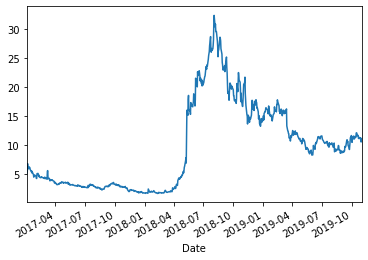

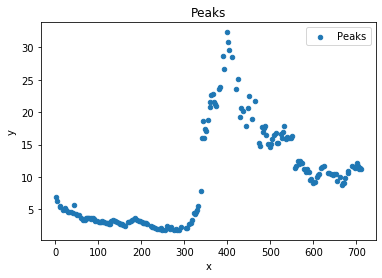

In [89]:
peaks = chart_peaksalgo(data['Close'])


data['Close'].iloc[peaks [0][1]]
data['Close'].plot(label = 'Close')

# Plot
data.reset_index().reset_index().iloc[peaks [0][:]].plot(label = 'Peaks', kind = 'scatter', x = 'index', y = 'Close')
plt.title('Peaks')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

(array([  2, 259, 338, 341, 344, 349, 355, 359, 361, 363, 370, 372, 374,
        390, 399, 420, 424, 448, 451, 457, 465, 483, 485, 502, 514, 525,
        653]),
 {'left_thresholds': array([1.4000001 , 0.72399998, 0.51000023, 4.61000061, 0.75      ,
         2.02999973, 1.44000053, 3.73000145, 0.61000061, 2.59999847,
         0.52000046, 0.62999916, 0.79999924, 1.57999992, 1.25000191,
         0.73999977, 1.32999992, 2.60000038, 1.65999985, 1.45999908,
         0.93999863, 0.80999947, 1.59000015, 0.80999947, 1.36000061,
         1.09000015, 0.65000057]),
  'right_thresholds': array([0.88000011, 0.50400007, 0.9000001 , 0.88000107, 2.23999977,
         0.54000092, 1.01499939, 1.38000107, 0.71999931, 0.67000008,
         0.97999954, 1.02999878, 0.68000031, 2.13999939, 1.98000145,
         0.98999977, 1.77000046, 1.3900013 , 0.75      , 1.1099987 ,
         2.81999969, 1.02000046, 0.68000031, 0.72999954, 1.69000053,
         0.57999992, 1.5       ])})

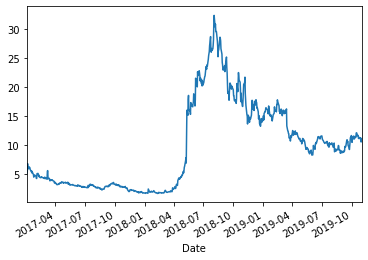

In [91]:
import scipy.signal as sig

def chart_peaksalgo (data):
    return sig.find_peaks(data, threshold = .5)
    
    
data['Close'].plot(label = 'Close')

chart_peaksalgo(data['Close'])

In [12]:
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date
data = yf.download('AMZN','2017-01-01','2019-11-03')

[*********************100%***********************]  1 of 1 completed


In [13]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100
2017-01-06,782.359985,799.440002,778.479980,795.989990,795.989990,5986200
2017-01-09,798.000000,801.770020,791.770020,796.919983,796.919983,3446100
...,...,...,...,...,...,...
2019-10-28,1748.060059,1778.699951,1742.500000,1777.079956,1777.079956,3708900
2019-10-29,1774.810059,1777.000000,1755.810059,1762.709961,1762.709961,2273700
2019-10-30,1760.239990,1782.380005,1759.119995,1779.989990,1779.989990,2442400


In [53]:
data.loc['2019-11-01']

Open             10.960000
High             11.250000
Low              10.710000
Close            11.030000
Adj Close        11.030000
Volume       231100.000000
MA_short         11.382857
MA_long          11.093871
Name: 2019-11-01 00:00:00, dtype: float64

In [70]:
data['Close'].iloc[0]

5.199999809265137

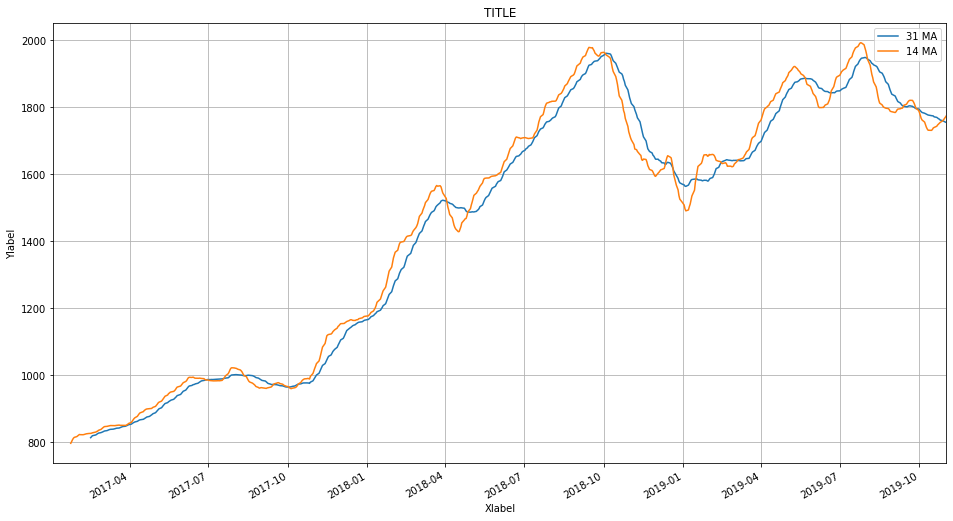

In [14]:
short_window = 14
long_window = 31

data_moving_long = data['Close'].rolling(long_window).mean()
data_moving_short = data['Close'].rolling(short_window).mean()

plt.figure(figsize=(16,9))

data_moving_long.plot(label = str(long_window) + ' MA')
data_moving_short.plot(label = str(short_window) + ' MA')
# data['Close'].plot(label = 'Close')

plt.title('TITLE')
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')
plt.grid()
plt.legend()

plt.show()

In [15]:
def trade_algorithm(data, short_window, long_window):
    
    short_window = short_window
    long_window = long_window

    data_moving_long = data['Close'].rolling(long_window).mean()
    data_moving_short = data['Close'].rolling(short_window).mean()

    data['MA_short'] = data_moving_short
    data['MA_long'] = data_moving_long

    initial_capital = 1

    current_state = 'sell'
    holdings = initial_capital
    
    prev_MA_long = None
    prev_MA_short = None
    
    for index, value in data.iterrows():

        if np.isnan(value['MA_short']) or np.isnan(value['MA_long']):
            continue

    #     print (index, "\n", value['MA_short'], "\n", value['MA_long'])
        
        if (prev_MA_short != None) and (prev_MA_long != None) and ( prev_MA_short < prev_MA_long ) and ( value['MA_short'] > value['MA_long'] ) and (current_state == 'sell'):
            # Buy stock
            print("Buy at: \t", value['Close'], "\nHoldings in USD:\t", holdings)
            print("\n")
            
            holdings = holdings/value['Close']

            current_state = 'buy'


        elif (prev_MA_short != None) and (prev_MA_long != None) and ( prev_MA_short > prev_MA_long ) and ( value['MA_short'] < value['MA_long'] ) and (current_state == 'buy'):
            # Sell stock
            print("Sell at: \t", value['Close'], "\nHoldings in USD:\t", holdings*value['Close'])
            print("\n")
            
            holdings = holdings*value['Close']

            current_state = 'sell'

        prev_MA_short = value['MA_short']
        prev_MA_long = value['MA_long']


    if (current_state == 'buy'):
        return holdings*value['Close']
    else:
        return holdings

In [16]:
trade_algorithm(data, short_window = 14, long_window = 31)

Buy at: 	 1026.8699951171875 
Holdings in USD:	 1


Sell at: 	 983.2999877929688 
Holdings in USD:	 0.9575700843033723


Buy at: 	 986.7899780273438 
Holdings in USD:	 0.9575700843033723


Sell at: 	 957.0999755859375 
Holdings in USD:	 0.9287592341996668


Buy at: 	 1002.9400024414062 
Holdings in USD:	 0.9287592341996668


Sell at: 	 1392.050048828125 
Holdings in USD:	 1.289089411300803


Buy at: 	 1572.6199951171875 
Holdings in USD:	 1.289089411300803


Sell at: 	 1952.760009765625 
Holdings in USD:	 1.6006932756905068


Buy at: 	 1663.5400390625 
Holdings in USD:	 1.6006932756905068


Sell at: 	 1377.449951171875 
Holdings in USD:	 1.3254113653216368


Buy at: 	 1683.780029296875 
Holdings in USD:	 1.3254113653216368


Sell at: 	 1622.6500244140625 
Holdings in USD:	 1.2772920137293267


Buy at: 	 1692.4300537109375 
Holdings in USD:	 1.2772920137293267


Sell at: 	 1815.47998046875 
Holdings in USD:	 1.3701588878391957


Buy at: 	 1911.300048828125 
Holdings in USD:	 1.370158887

1.2435017184312684